# Roots and Integration of real-valued functions

Discussão sobre a implementação computacional e conceitos relevantes de métodos para encontrar a raíz de funções com valor real:

Discuss the relevant concepts and the computational implementation of methods to find roots of real-valued functions: 
- Bisection - Método da Bissecção
- Newton's Method (or Newton-Raphson) - Método de Newton-Raphson
- Quasi-Newton (Secant) - Método da Secante

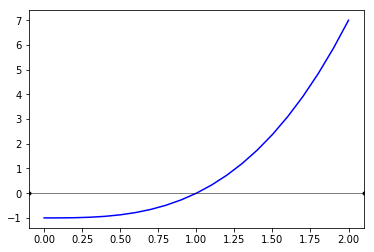

In [3]:
import matplotlib.pyplot as plt
x = [x/10 for x in range(0, 21)]
y = [x**3-1 for x in x]
plt.plot(x, y, 'b')
plt.axhline(y=0, linewidth=.5, color='k', marker='.')
plt.show()

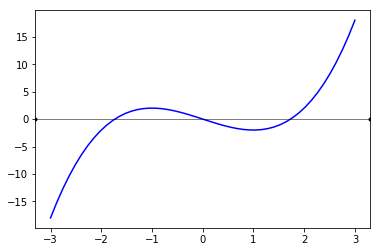

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
y = [x**3-1-3*x+1 for x in x]
plt.plot(x, y, 'b')
plt.axhline(y=0, linewidth=.5, color='k', marker='.')
plt.show()

## Bracketing
### Bisection - Bissecsção

In [4]:
def bisection(f, a, b, delta=1e-5, eps=1e-7):

    # f: a function
    # a: lower limit
    # b: upper limit
    
    if f(a)*f(b) <= 0:
        
        x_low = a
        x_high = b
        e = 1 # abs(x_high - x_low)
        d = 1 # f(M)
        i = 0
        #print("{joao:2d}: [{x_low:0.8f}, {x_high:0.8f}]".format(joao = i, x_low = x_low, x_high = x_high))
        
        while abs(e)>eps*(1+abs(x_low)+abs(x_high)) or abs(d)>delta:
            
            i += 1
            
            midpoint = (x_low+x_high)/2
            if f(x_low)*f(midpoint)<0:
                x_high = midpoint
            else:
                x_low = midpoint
                
            midpoint = (x_low+x_high)/2
            e = x_high-x_low
            d = f(midpoint)
            #print("{i:2d}: [{x_low:0.12f}, {x_high:0.12f}]".format(i = i, x_low = x_low, x_high = x_high))
            
        return midpoint

In [5]:
def func(x):
    return x**3-1

In [6]:
%time bisection(func, .4, 3)

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 39.1 µs


1.000000041723251

In [7]:
# testing
%time bisection(lambda x: x**3-1, .4, 3)

CPU times: user 42 µs, sys: 1 µs, total: 43 µs
Wall time: 47.2 µs


1.000000041723251

## Newton's Method

http://mathworld.wolfram.com/NewtonsMethod.html <br>
http://tutorial.math.lamar.edu/Classes/CalcI/NewtonsMethod.aspx

In [8]:
# derive
def derive(func, x, eps=1e-6):
    "derive: calculates the derivative of a real-valued function at a certain point of its domain."
    if func(x) or func(x) == 0:
        return (func(x+eps)-func(x-eps))/(2*eps)

In [9]:
# newton
def newton(func, x, eps=10**(-5), delta=10**(-7)):
    "newton: finds a root of a real-valued function using Newton's method."
    
    e = 1
    d = abs(func(x))
    i = 0
    
    x0 = x
    
    while e>eps or d>delta:
        
        i = i+1
        x1 = x0-(func(x0)/derive(func, x0))
        e = abs(x1-x0)
        d = abs(func(x1))
        print("interaction: ", i)
        print("{0:.6f} -> {1:.6f}".format(x0,x1))
        print("e={0:.6f} d={1:.6f}".format(e,d))
        print("---------------------------------")
        x0 = x1
        
    return (x0, i)

In [10]:
%time newton(lambda w: w**3-1, 3)

interaction:  1
3.000000 -> 2.037037
e=0.962963 d=7.452726
---------------------------------
interaction:  2
2.037037 -> 1.438355
e=0.598682 d=1.975764
---------------------------------
interaction:  3
1.438355 -> 1.120022
e=0.318333 d=0.405012
---------------------------------
interaction:  4
1.120022 -> 1.012402
e=0.107620 d=0.037670
---------------------------------
interaction:  5
1.012402 -> 1.000151
e=0.012251 d=0.000454
---------------------------------
interaction:  6
1.000151 -> 1.000000
e=0.000151 d=0.000000
---------------------------------
interaction:  7
1.000000 -> 1.000000
e=0.000000 d=0.000000
---------------------------------
CPU times: user 1.75 ms, sys: 1.51 ms, total: 3.27 ms
Wall time: 1.84 ms


(1.0000000000000004, 7)

## Quasi-Newton

### Secant Method
http://mathworld.wolfram.com/SecantMethod.html

In [11]:
# quasi-newton (secant)
def secant(func, x0, x1, eps=10**(-5), delta=10**(-7)):
    "quasi-newton (secant): finds a root of a real-valued function using the secant method."
    
    e = 1
    d = abs(func(x1))
    i = 0
    
    while e>eps or d>delta:
        
        i = i+1
        x2 = x1-(func(x1)*(x1-x0)/(func(x1)-func(x0)))
        e = abs(x2-x1)
        d = abs(func(x2))
        print("interaction: ", i)
        print("{0:.6f} -> {1:.6f}".format(x1, x2))
        print("e={0:.6f} d={1:.6f}".format(e, d))
        print("---------------------------------")
        x0 = x1
        x1 = x2
        
    return (x2, i)

In [12]:
%time secant(lambda w: w**3-1, 4, 3)

interaction:  1
3.000000 -> 2.297297
e=0.702703 d=11.124158
---------------------------------
interaction:  2
2.297297 -> 1.771816
e=0.525481 d=4.562319
---------------------------------
interaction:  3
1.771816 -> 1.406459
e=0.365357 d=1.782155
---------------------------------
interaction:  4
1.406459 -> 1.172256
e=0.234203 d=0.610896
---------------------------------
interaction:  5
1.172256 -> 1.050102
e=0.122154 d=0.157964
---------------------------------
interaction:  6
1.050102 -> 1.007500
e=0.042602 d=0.022670
---------------------------------
interaction:  7
1.007500 -> 1.000362
e=0.007139 d=0.001086
---------------------------------
interaction:  8
1.000362 -> 1.000003
e=0.000359 d=0.000008
---------------------------------
interaction:  9
1.000003 -> 1.000000
e=0.000003 d=0.000000
---------------------------------
CPU times: user 1.86 ms, sys: 1.57 ms, total: 3.43 ms
Wall time: 1.98 ms


(1.0000000009764454, 9)

## using `scipy.optimize`

In [13]:
from scipy import optimize as opt

In [14]:
%time opt.bisect(lambda w: w**3-1, .4, 3)

CPU times: user 27 µs, sys: 2 µs, total: 29 µs
Wall time: 32.9 µs


0.999999999999545

In [15]:
%time opt.newton(lambda w: w**3-1, 3)

CPU times: user 22 µs, sys: 1 µs, total: 23 µs
Wall time: 26.9 µs


1.0

In [16]:
%time opt.newton(lambda w: w**3-1, 3, fprime=lambda w: 3*(w**2))

CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 26.9 µs


1.0

## Application: Internal Rate of Return

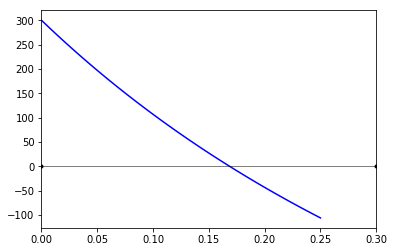

In [17]:
import matplotlib.pyplot as plt

v = [-1000, 500, 500, 500, -200]
def vpl(v, r):
        return sum([value*(1+r)**(-period) for period, value in enumerate(v)])

x = [x/400 for x in range(101)]
y = [vpl(v, r) for r in x]
plt.plot(x, y, 'b')
plt.axhline(y=0, linewidth=.5, color='k', marker='.')
plt.xlim((0,.3))
plt.show()

In [18]:
from scipy import optimize as opt
def irr(v, r0):
    
    def vpl(r):
        return sum([value*(1+r)**(-t) for t,value in enumerate(v)])
    
    return opt.newton(vpl, r0)

In [19]:
# testing
v = [-1000, 500, 500, 500, -200]
irr(v, 0.05)

0.16864273669048988

## Integration

In [20]:
import math

In [21]:
print(dir(math))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'pi', 'pow', 'radians', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


In [22]:
math.e

2.718281828459045

In [23]:
math.exp(2)

7.38905609893065

In [24]:
math.pi

3.141592653589793

In [25]:
math.nan

nan

### Rectangle method
$\int_{a}^{b}{f(x)dx} \approx \Delta x\,\sum_{i=1}^{n}{f(m_i)}$ where $\Delta x = \frac{b-a}{n}$ and $m_{i} = a + \frac{\Delta x}{2} i$

In [26]:
def rectangle(f, a, b, n):
    
    step = (b-a)/n
    I = 0
    
    for i in range(int(n)):
        I += f(a+(2*i+1)*step/2)
        
    return I*step

In [27]:
1e5

100000.0

In [28]:
# test 1
rectangle(lambda x: x**2, 0, 12, 1e5)

575.9999999855918

In [29]:
# test 1
rectangle(lambda x: math.exp(x), 0, 1, 10)

1.7175660864611277

### Trapezoid rule
$\int_{a}^{b}{f(x)dx} \approx \frac{\Delta x}{2}\,\sum_{i=1}^{n}{[f(x_{i-1})+f(x_{i})]} = \frac{\Delta x}{2}\,\left[f(x_{0})+2\,f(x_{1})+2\,f(x_{1})+...+2\,f(x_{n-1})+f(x_{n})\right]$ where $\Delta x = \frac{b-a}{n}$ and $x_{i} = a + \Delta x\,i$

In [30]:
def trapezoid(f, a, b, n):
    
    step = (b - a)/n
    I = f(a) + f(b)
       
    for i in range(1, int(n), 1):
        I += 2*f(a+i*step)
                
    return I*step/2

In [31]:
# test
trapezoid(lambda x: x**2, 0, 12, 1000)

576.0002880000003

In [32]:
# test
trapezoid(lambda x: math.exp(x), 0, 1, 10)

1.7197134913893146

### Simpson's rule
[Reference from Wolfran's MathWorld](http://mathworld.wolfram.com/SimpsonsRule.html)

$\int_{a}^{b}{f(x)dx} \approx \frac{\Delta x}{3}\,\left[f(x_{0})+4\,f(x_{1})+2\,f(x_{2})+4\,f(x_{3})+2\,f(x_{4})+...+2\,f(x_{n-2})+4\,f(x_{n-1})+f(x_{n})\right]$ where $\Delta x = \frac{b-a}{n}$.

In [33]:
def simpson(f, a, b, n):
    
    step = (b-a)/n
    I = f(a)+f(b)
       
    for i in range(1, int(n), 2):
        I += 4*f(a+i*step)
    
    for i in range(2, int(n-1), 2):
        I += 2*f(a+i*step)
                
    return I*step/3

In [34]:
# test
simpson(lambda x: x**2, 0, 12, 1e5)

576.0000000000049

In [35]:
# test
simpson(lambda x: math.exp(x), 0, 1, 10)

1.7182827819248236

In [36]:
from scipy import integrate
# help(integrate)

In [37]:
help(integrate.trapz)

Help on function trapz in module numpy.lib.function_base:

trapz(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    Integrate `y` (`x`) along given axis.
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
        The axis along which to integrate.
    
    Returns
    -------
    trapz : float
        Definite integral as approximated by trapezoidal rule.
    
    See Also
    --------
    sum, cumsum
    
    Notes
    -----
    Image [2]_ illustrates trapezoidal rule -- y-axis locations of points
    will be taken from `y` array, by default x-axis distances betwee